In [1]:
from qiskit.quantum_info import Statevector, Operator
from QuditsOnQubits import QuditsOnQubits
import numpy as np
import networkx as nx
from numpy.linalg import multi_dot
import matplotlib.pyplot as plt
import igraph as ig
import pandas as pd
from itertools import product

In [2]:
ame43 = QuditsOnQubits().ame43circ

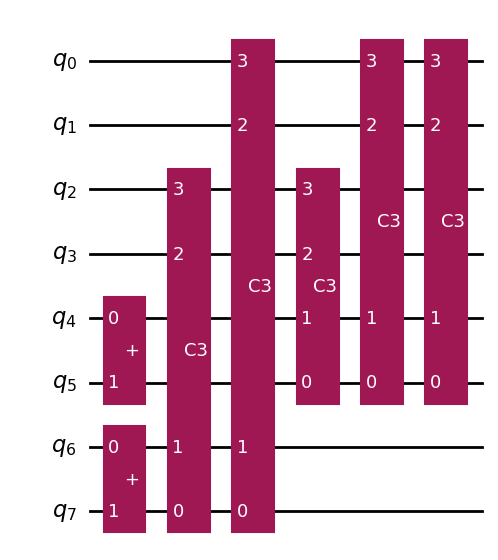

In [3]:
ame43.draw('mpl')

In [4]:
omega = np.exp(2*np.pi*1.j/3)
Z = [[1, 0, 0, 0], [0, omega, 0, 0], [0, 0, omega*omega, 0], [0, 0, 0, 1]]
X = [[0,0,1,0], [1,0,0,0], [0,1,0,0],[0,0,0,1]]

G1 = np.kron(np.kron(np.kron(X, Z), np.identity(4)), Z)
G1G2 = np.kron(np.kron(np.kron(np.dot(X, Z), np.dot(Z, X)), Z), Z)
G1G2pow2 = np.kron(np.kron(np.kron(multi_dot([X, Z, Z]), multi_dot([Z, X, X])), multi_dot([Z, Z])), Z)
G3 = np.kron(np.kron(np.kron(np.identity(4), Z), X), multi_dot([Z, Z]))
G1G4 = np.kron(np.kron(np.kron(multi_dot([X, Z]), Z), multi_dot([Z, Z])), multi_dot([Z, X]))

In [5]:
ame43state = Statevector(ame43).data

In [6]:
multi_dot([ame43state.conj().transpose(), G1, ame43state]).round()

np.complex128(-0j)

In [23]:
def ame43_checker_gen(ameMTX):
    omega = np.exp(2*np.pi*1.j/3)
    Z = [[1, 0, 0, 0], [0, omega, 0, 0], [0, 0, omega*omega, 0], [0, 0, 0, 1]]
    X = [[0,0,1,0], [1,0,0,0], [0,1,0,0],[0,0,0,1]]
    I = np.identity(4)
    ops = [Z, X, I]
    names = ["Z", "X", "I"]

    G1_dict = {}
    G1G2_dict = {}
    G1G2pow2_dict = {}
    G3_dict = {}
    G1G4_dict = {}

    tensor_symbol = "\u2297"

    for combination in product(zip(ops, names), repeat=9):

        if len(G1_dict) > 2 and len(G1G2_dict) > 2 and len(G1G2pow2_dict) > 2 and len(G3_dict) > 2 and len(G1G4_dict) > 2:
            break

        (i, i2), (j, j2), (k, k2), (l, l2), (m, m2), (n, n2), (o, o2), (p, p2), (q, q2) = combination
        G1 = np.kron(np.kron(np.kron(i, j), k), l)
        G1G2 = np.kron(np.kron(np.kron(np.dot(i, j), np.dot(k, l)), m), n)
        G1G2pow2 = np.kron(np.kron(np.kron(multi_dot([i, j, k]), multi_dot([l, m, n])), multi_dot([o, p])), q)
        G3 = np.kron(np.kron(np.kron(i, j), k), multi_dot([l, m]))
        G1G4 = np.kron(np.kron(np.kron(multi_dot([i, j]), k), multi_dot([l, m])), multi_dot([n, o]))

        G1_text = f'{i2}{tensor_symbol}{j2}{tensor_symbol}{k2}{tensor_symbol}{l2}'

        G1G2_text = f'{i2}{j2}{tensor_symbol}{k2}{l2}{tensor_symbol}{m2}{tensor_symbol}{n2}'

        G1G2pow2_text = f'{i2}{j2}{k2}{tensor_symbol}{l2}{m2}{n2}{tensor_symbol}{o2}{p2}{tensor_symbol}{q2}'

        G3_text = f'{i2}{tensor_symbol}{j2}{tensor_symbol}{k2}{tensor_symbol}{l2}{m2}'

        G1G4_text = f'{i2}{j2}{tensor_symbol}{k2}{tensor_symbol}{l2}{m2}{tensor_symbol}{n2}{o2}'

        evG1 = multi_dot([ameMTX.conj().transpose(), G1, ameMTX])
        evG1G2 = multi_dot([ameMTX.conj().transpose(), G1G2, ameMTX])
        evG1G2pow2 = multi_dot([ameMTX.conj().transpose(), G1G2pow2, ameMTX])
        evG3 = multi_dot([ameMTX.conj().transpose(), G3, ameMTX])
        evG1G4 = multi_dot([ameMTX.conj().transpose(), G1G4, ameMTX])

        ev_list = [evG1, evG1G2, evG1G2pow2, evG3, evG1G4]

        if np.real(evG1.round(4)) == 1 and G1_text not in G1_dict:
            G1_dict[G1_text] = evG1.round(4)
        if np.real(evG1G2.round(4)) == 1 and G1G2_text not in G1G2_dict:
            G1G2_dict[G1G2_text] = evG1G2.round(4)
        if np.real(evG1G2pow2.round(4)) == 1 and G1G2pow2_text not in G1G2pow2_dict:
            G1G2pow2_dict[G1G2pow2_text] = evG1G2pow2.round(4)
        if np.real(evG3.round(4)) == 1 and G3_text not in G3_dict:
            G3_dict[G3_text] = evG3.round(4)
        if np.real(evG1G4.round(4)) == 1 and G1G4_text not in G1G4_dict:
            G1G4_dict[G1G4_text] = evG1G4.round(4)

        # if any(np.real(x.round(4)) == 1 for x in ev_list):
        #     print(f'G1: {G1_text} => {evG1.round(4)}')
        #     print(f'G1G2: {G1G2_text} => {evG1G2.round(4)}')
        #     print(f'G1G2pow2: {G1G2pow2_text} => {evG1G2pow2.round(4)}')
        #     print(f'G3: {G3_text} => {evG3.round(4)}')
        #     print(f'G1G4: {G1G4_text} => {evG1G4.round(4)}')
        #     print("----------------------------------")

    return G1_dict, G1G2_dict, G1G2pow2_dict, G3_dict, G1G4_dict

In [24]:
G1_dict, G1G2_dict, G1G2pow2_dict, G3_dict, G1G4_dict = ame43_checker_gen(ame43state)

In [25]:
G1_dict

{'Z⊗I⊗Z⊗Z': np.complex128(1-0j), 'I⊗I⊗I⊗I': np.complex128(1+0j)}

In [26]:
G1G2_dict

{'ZZ⊗ZZ⊗Z⊗I': np.complex128(1-0j),
 'ZZ⊗ZI⊗I⊗Z': np.complex128(1-0j),
 'ZZ⊗IZ⊗I⊗Z': np.complex128(1-0j),
 'ZI⊗II⊗Z⊗Z': np.complex128(1-0j),
 'IZ⊗II⊗Z⊗Z': np.complex128(1-0j),
 'II⊗II⊗I⊗I': np.complex128(1+0j)}

In [27]:
G1G2pow2_dict

{'ZZZ⊗ZZZ⊗II⊗I': np.complex128(1-0j),
 'ZZZ⊗ZZI⊗ZZ⊗Z': np.complex128(1-0j),
 'ZZZ⊗ZIZ⊗ZZ⊗Z': np.complex128(1-0j),
 'ZZZ⊗XXX⊗II⊗I': np.complex128(1-0j),
 'ZZZ⊗IZZ⊗ZZ⊗Z': np.complex128(1-0j),
 'ZZZ⊗III⊗II⊗I': np.complex128(1-0j),
 'ZZI⊗ZZI⊗ZI⊗I': np.complex128(1-0j),
 'ZZI⊗ZZI⊗IZ⊗I': np.complex128(1-0j),
 'ZZI⊗ZIZ⊗ZI⊗I': np.complex128(1-0j),
 'ZZI⊗ZIZ⊗IZ⊗I': np.complex128(1-0j),
 'ZZI⊗ZII⊗II⊗Z': np.complex128(1-0j),
 'ZZI⊗IZZ⊗ZI⊗I': np.complex128(1-0j),
 'ZZI⊗IZZ⊗IZ⊗I': np.complex128(1-0j),
 'ZZI⊗IZI⊗II⊗Z': np.complex128(1-0j),
 'ZZI⊗IIZ⊗II⊗Z': np.complex128(1-0j),
 'ZIZ⊗ZZI⊗ZI⊗I': np.complex128(1-0j),
 'ZIZ⊗ZZI⊗IZ⊗I': np.complex128(1-0j),
 'ZIZ⊗ZIZ⊗ZI⊗I': np.complex128(1-0j),
 'ZIZ⊗ZIZ⊗IZ⊗I': np.complex128(1-0j),
 'ZIZ⊗ZII⊗II⊗Z': np.complex128(1-0j),
 'ZIZ⊗IZZ⊗ZI⊗I': np.complex128(1-0j),
 'ZIZ⊗IZZ⊗IZ⊗I': np.complex128(1-0j),
 'ZIZ⊗IZI⊗II⊗Z': np.complex128(1-0j),
 'ZIZ⊗IIZ⊗II⊗Z': np.complex128(1-0j),
 'ZII⊗ZZZ⊗ZI⊗Z': np.complex128(1-0j),
 'ZII⊗ZZZ⊗IZ⊗Z': np.complex128(1-0j),
 'ZII⊗ZII⊗ZZ

In [28]:
G3_dict

{'Z⊗I⊗Z⊗ZI': np.complex128(1-0j),
 'Z⊗I⊗Z⊗IZ': np.complex128(1-0j),
 'I⊗Z⊗Z⊗ZZ': np.complex128(1-0j),
 'I⊗I⊗I⊗II': np.complex128(1+0j)}

In [29]:
G1G4_dict

{'ZZ⊗Z⊗II⊗ZI': np.complex128(1-0j),
 'ZZ⊗Z⊗II⊗IZ': np.complex128(1-0j),
 'ZZ⊗I⊗ZZ⊗ZZ': np.complex128(1-0j),
 'ZI⊗Z⊗ZZ⊗II': np.complex128(1-0j),
 'ZI⊗I⊗ZI⊗ZI': np.complex128(1-0j),
 'ZI⊗I⊗ZI⊗IZ': np.complex128(1-0j),
 'ZI⊗I⊗IZ⊗ZI': np.complex128(1-0j),
 'ZI⊗I⊗IZ⊗IZ': np.complex128(1-0j),
 'IZ⊗Z⊗ZZ⊗II': np.complex128(1-0j),
 'IZ⊗I⊗ZI⊗ZI': np.complex128(1-0j),
 'IZ⊗I⊗ZI⊗IZ': np.complex128(1-0j),
 'IZ⊗I⊗IZ⊗ZI': np.complex128(1-0j),
 'IZ⊗I⊗IZ⊗IZ': np.complex128(1-0j),
 'II⊗Z⊗ZI⊗ZZ': np.complex128(1-0j),
 'II⊗Z⊗IZ⊗ZZ': np.complex128(1-0j),
 'II⊗I⊗II⊗II': np.complex128(1+0j)}